# <font color='orange'>1. Import Libraries</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# <font color='orange'>2. Text to Binary</font>

In [28]:
name="My name is Eslam"

In [29]:
print("The Original String is:- "+name)

The Original String is:- My name is Eslam


In [30]:
res=''.join(format(ord(i),'b')for i in name)

In [31]:
print(res)

1001101111100110000011011101100001110110111001011000001101001111001110000010001011110011110110011000011101101


# <font color='orange'>3. Binary to Text</font>

In [26]:
def BinaryToInteger(binary):
    """
    Converts a binary number (in string form) to its decimal (integer) equivalent.
    """
    decimal = 0
    i = 0
    # Reverse the binary string for easier processing from least significant bit
    binary = binary[::-1]

    for bit in binary:
        decimal += int(bit) * pow(2, i)  # Multiply the bit by 2^i and add to decimal
        i += 1
    return decimal

# Example binary data as string
bin_data = "0100100001100101011011000110110001101111"  # Represents 'Hello'

print("The binary value is:", bin_data)

The binary value is: 0100100001100101011011000110110001101111


In [27]:
str_data = ''

# Process the binary string in 8-bit chunks (ASCII encoding uses 8 bits)
for i in range(0, len(bin_data), 8):
    temp_data = bin_data[i:i + 8]  # Extract an 8-bit chunk (for standard ASCII)
    decimal_data = BinaryToInteger(temp_data)  # Convert binary to decimal
    str_data += chr(decimal_data)  # Convert decimal to ASCII character and append

print("The decoded string is:", str_data)

The decoded string is: Hello


## <font color='orange'>Function to convert the input message to Binary.</font>
> converts each character to its ASCII value (using ord()),

In [45]:
def message2binary(message):
    """
    Converts a message (string, bytes, or integer) to its binary representation.

    - For strings: Converts each character to its binary representation using UTF-8 encoding.
    - For bytes/ndarray: Converts each element to its 8-bit binary representation.
    - For integers: Converts the integer to an 8-bit binary representation.

    Args:
    message (str, bytes, np.ndarray, int): The message to convert.

    Returns:
    str or list: The binary representation of the message.
    """
    if isinstance(message, str):
        # For strings, convert each character to its UTF-8 encoded binary representation
        # UTF-8 encodes characters in a variable-length format, so we need to handle multi-byte characters
        result = ''.join([format(byte, '08b') for char in message.encode('utf-8') for byte in [char]])

    elif isinstance(message, (bytes, np.ndarray)):
        # For bytes or ndarray, convert each element to 8-bit binary
        result = [format(i, '08b') for i in np.array(message, dtype=np.uint8)]

    elif isinstance(message, (int, np.uint8)):
        # For a single integer or np.uint8, convert it to 8-bit binary
        result = format(message, '08b')

    else:
        raise TypeError("Input type not supported. Accepted types: str, bytes, np.ndarray, int.")

    return result


# Here we are using 08b as we require 8 bit representation of binary digits.
# If we will be using only b then it will not add 0 to convert it into 8 bits and returns the binary converted value..


In [46]:
# Example with string
message = "Hello"
binary_message = message2binary(message)
print(binary_message)  # Binary representation of "Hello"

# Example with np.ndarray
array_message = np.array([65, 66, 67], dtype=np.uint8)  # ASCII values of 'A', 'B', 'C'
binary_array = message2binary(array_message)
print(binary_array)  # Binary representation of [65, 66, 67]

# Example with integer
int_message = 255
binary_int = message2binary(int_message)
print(binary_int)  # Binary representation of 255

0100100001100101011011000110110001101111
['01000001', '01000010', '01000011']
11111111


# Importing Image-->

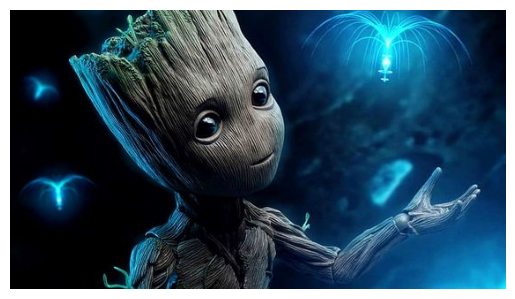

In [35]:
image=plt.imread("/content/1.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

# How to overwrite the LSB bit of a binary number and converting it to decimal.

In [ ]:
h='1000110'
print(int(h,2))   # Print Decimal number
int(h[:-1]+'1',2) # Print decimal number after convert LSB `0` to `1`

70


71

# [:-1] neglects the LSB bit then we can add a bit and by int(value,2) we will change it to new decimal value..

# <font color='orange'>4. Encoder Function</font>

In [36]:
def encode_data(img):
    # Create a copy of the image to modify
    img = img.copy()

    # Prompt the user to enter the data to be encoded
    data = input("Enter the data to be encoded: ")
    if len(data) == 0:
        raise ValueError('Data is empty')  # Check if data is empty and raise an error if it is

    # Prompt the user for the name of the new image file after encoding
    filename = input("Enter the name of the new image after encoding (with extension): ")

    # Calculate the maximum number of bytes that can be encoded in the image
    no_bytes = (img.shape[0] * img.shape[1] * 3) // 8  # Each pixel has 3 color channels (R, G, B)
    print("Maximum bytes to encode:", no_bytes)

    # Check if the length of the data exceeds the image's encoding capacity
    if len(data) > no_bytes:
        raise ValueError("Error encountered: Insufficient bytes, Need Bigger Image or Less Data!!")

    # Append a delimiter to mark the end of the message
    data += '#END#'

    # Convert the data to binary format
    data_binary = message2binary(data)
    data_len = len(data_binary)
    print("The length of binary data:", data_len)

    data_index = 0  # Initialize data index to keep track of where we are in the binary data

    # Loop through each pixel in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]

            # Convert the pixel values to binary format
            r, g, b = message2binary(pixel[0]), message2binary(pixel[1]), message2binary(pixel[2])

            # Check if there is more data to encode
            if data_index < data_len:
                # Modify the least significant bit (LSB) of the red channel
                pixel[0] = int(r[:-1] + data_binary[data_index], 2)
                data_index += 1

            if data_index < data_len:
                # Modify the LSB of the green channel
                pixel[1] = int(g[:-1] + data_binary[data_index], 2)
                data_index += 1

            if data_index < data_len:
                # Modify the LSB of the blue channel
                pixel[2] = int(b[:-1] + data_binary[data_index], 2)
                data_index += 1

            # Stop encoding if all data has been processed
            if data_index >= data_len:
                break

        # Stop encoding if all data has been processed
        if data_index >= data_len:
            break

    # Ensure the pixel values are within the proper range (0-255) after modification
    img = np.clip(img, 0, 255).astype(np.uint8)

    # Save the modified image with the encoded data
    plt.imsave(filename, img)
    print("Encoded the data successfully and the image is successfully saved as", filename)



# ENCODING THE DATA-->



In [55]:
encode_data(image)

Enter the data to be encoded: Welcome in Egypt
Enter the name of the new image after encoding (with extension): new.png
Maximum bytes to encode: 66926
The length of binary data: 168
Encoded the data successfully and the image is successfully saved as new.png


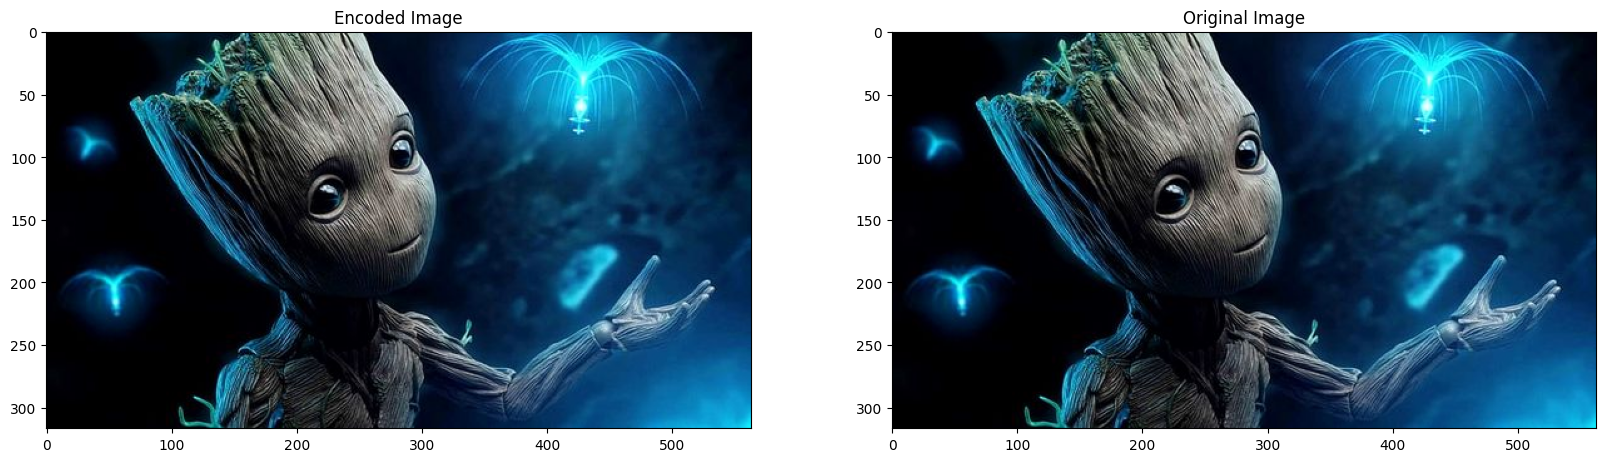

In [56]:
encode_data1 = plt.imread("/content/new.png")

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(encode_data1)
plt.title("Encoded Image")
plt.subplot(1,2,2)
plt.imshow(image)
plt.title("Original Image")
plt.show()

# <font color='orange'>4. Decoder Function</font>


In [57]:
def decode_data(img):
    binary_data = []  # Use a list to accumulate binary bits

    # Check if the image is in the correct range (0-255)
    if img.max() <= 1:  # Assuming the image is in float (0-1), scale it
        img = (img * 255).astype(np.uint8)

    # Loop through each pixel in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]
            # Convert the pixel values to binary format for each channel
            r = format(pixel[0], '08b')  # Red channel
            g = format(pixel[1], '08b')  # Green channel
            b = format(pixel[2], '08b')  # Blue channel

            # Collect the least significant bits (LSB) from RGB channels
            binary_data.append(r[-1])  # LSB of Red
            binary_data.append(g[-1])  # LSB of Green
            binary_data.append(b[-1])  # LSB of Blue

    # Join binary data into a single string
    binary_data = ''.join(binary_data)

    # Split the binary data into chunks of 8 bits (1 byte)
    all_bytes = [binary_data[i:i + 8] for i in range(0, len(binary_data), 8)]

    # Convert binary data (bytes) to characters using UTF-8
    decoded_data = ''.join([chr(int(byte, 2)) for byte in all_bytes])

    # Look for the end delimiter "#END#" to stop decoding
    end_index = decoded_data.find("#END#")
    if end_index != -1:
        decoded_data = decoded_data[:end_index]

    # Decode the binary data to the correct encoding (UTF-8)
    try:
        decoded_data = decoded_data.encode('latin1').decode('utf-8')
    except UnicodeDecodeError:
        print("Error: Decoding failed. Ensure that the correct encoding is used.")

    # Print the decoded data
    print("The Decoded data was :--", decoded_data)


# Decoding Data-->


In [58]:
image1=plt.imread("/content/new.png")

In [59]:
decode_data(image1)

The Decoded data was :-- Welcome in Egypt
